In [4]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Bhuvana P\Downloads\All Appliances.csv\All Appliances.csv")
df.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Pigeon by Stovekraft Amaze Plus Electric Kettl...,appliances,All Appliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Pigeon-Amaze-Plus-1-5-Lt...,3.9,"128,941",₹599,"₹1,245"
1,Pigeon Polypropylene Mini Handy and Compact Ch...,appliances,All Appliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Pigeon-Stovekraft-Plasti...,4.1,"274,505",₹199,₹545
2,Glun Multipurpose Portable Electronic Digital ...,appliances,All Appliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Multipurpose-Portable-El...,3.8,365,₹199,₹899
3,beatXP Kitchen Scale Multipurpose Portable Ele...,appliances,All Appliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/beatXP-Multipurpose-Port...,3.7,"3,290",₹299,"₹1,999"
4,Bajaj DX-6 1000W Dry Iron with Advance Solepla...,appliances,All Appliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Bajaj-Majesty-1000-Watt-...,4.2,"24,380",₹625,"₹1,400"


In [5]:
df.isnull()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
9571,False,False,False,False,False,False,False,False,False
9572,False,False,False,False,False,False,False,False,False
9573,False,False,False,False,False,False,False,False,False
9574,False,False,False,False,False,True,True,False,False


In [6]:
df.isnull().sum()

name                0
main_category       0
sub_category        0
image               0
link                0
ratings           478
no_of_ratings     478
discount_price    362
actual_price       91
dtype: int64

In [7]:
df['no_of_ratings'] = df['no_of_ratings'].astype(str)
df['no_of_ratings'] = df["no_of_ratings"].str.replace(',', '',regex = True)
df['no_of_ratings'] = pd.to_numeric(df['no_of_ratings'], errors='coerce')
df['no_of_ratings'] = df['no_of_ratings'].fillna(df['no_of_ratings'].mean())

df['ratings']= pd.to_numeric(df['ratings'], errors = 'coerce')
df['ratings'] = df['ratings'].fillna(df['ratings'].mean())

df['discount_price'] = df['discount_price'].astype(str)
df['discount_price']=df['discount_price'].str.replace('₹','',regex=True).str.replace(',','',regex=True)
df['discount_price']=pd.to_numeric(df['discount_price'], errors='coerce')
df['discount_price'] = df['discount_price'].fillna(df['discount_price'].median())

df['actual_price'] = df['actual_price'].astype(str)
df['actual_price']= df['actual_price'].str.replace('₹','',regex = True).str.replace(',','',regex=True)
df['actual_price'] = pd.to_numeric(df['actual_price'], errors = 'coerce')
df['actual_price'] = df['actual_price'].fillna(df['actual_price'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            9576 non-null   object 
 1   main_category   9576 non-null   object 
 2   sub_category    9576 non-null   object 
 3   image           9576 non-null   object 
 4   link            9576 non-null   object 
 5   ratings         9576 non-null   float64
 6   no_of_ratings   9576 non-null   float64
 7   discount_price  9576 non-null   float64
 8   actual_price    9576 non-null   float64
dtypes: float64(4), object(5)
memory usage: 673.4+ KB


In [8]:
df['price_diff'] = df['actual_price'] - df['discount_price']
df['discount_percent'] = ((df['price_diff']/df['actual_price'])*100).round(2)
df.head(10)


,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,price_diff,discount_percent
0,Pigeon by Stovekraft Amaze Plus Electric Kettl...,appliances,All Appliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Pigeon-Amaze-Plus-1-5-Lt...,3.9,128941.0,599.0,1245.0,646.0,51.89
1,Pigeon Polypropylene Mini Handy and Compact Ch...,appliances,All Appliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Pigeon-Stovekraft-Plasti...,4.1,274505.0,199.0,545.0,346.0,63.49
2,Glun Multipurpose Portable Electronic Digital ...,appliances,All Appliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Multipurpose-Portable-El...,3.8,365.0,199.0,899.0,700.0,77.86
3,beatXP Kitchen Scale Multipurpose Portable Ele...,appliances,All Appliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/beatXP-Multipurpose-Port...,3.7,3290.0,299.0,1999.0,1700.0,85.04
4,Bajaj DX-6 1000W Dry Iron with Advance Solepla...,appliances,All Appliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Bajaj-Majesty-1000-Watt-...,4.2,24380.0,625.0,1400.0,775.0,55.36
5,Bajaj Frore 1200 mm Ceiling Fan (Brown),appliances,All Appliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Bajaj-Frore-1200-Brown-C...,4.1,9971.0,1349.0,2660.0,1311.0,49.29
6,Kuber Industries Nylon Mesh Laundry Basket|Stu...,appliances,All Appliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Kuber-Industries-Laundry...,3.7,4210.0,92.0,99.0,7.0,7.07
7,"Prestige Electric Kettle PKOSS - 1500watts, St...",appliances,All Appliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Prestige-Electric-Kettle...,3.9,64888.0,699.0,1445.0,746.0,51.63
8,NutriPro Juicer Mixer Grinder - Smoothie Maker...,appliances,All Appliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/NutriPro-Bullet-Juicer-G...,4.1,6023.0,1990.0,6000.0,4010.0,66.83
9,Philips GC1905 1440-Watt Steam Iron with Spray...,appliances,All Appliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Philips-GC1905-1440-Watt...,4.3,38928.0,1699.0,2295.0,596.0,25.97


In [9]:
df.drop(['image','link','name'], axis=1, inplace= True)

In [10]:
print(df.columns)

Index(['main_category', 'sub_category', 'ratings', 'no_of_ratings',
       'discount_price', 'actual_price', 'price_diff', 'discount_percent'],
      dtype='object')


In [11]:
print(df.isnull().sum())

main_category       0
sub_category        0
ratings             0
no_of_ratings       0
discount_price      0
actual_price        0
price_diff          0
discount_percent    0
dtype: int64


In [12]:
print(df.dtypes)

main_category        object
sub_category         object
ratings             float64
no_of_ratings       float64
discount_price      float64
actual_price        float64
price_diff          float64
discount_percent    float64
dtype: object


In [13]:
df= pd.get_dummies(df,columns=['main_category','sub_category'],drop_first = True)


In [ ]:
#df['discount_percent'] = ((df['actual_price'] - df['discount_price'])/df['actual_price'])*100

In [14]:
print(df[df['discount_price'] <= 0])


Empty DataFrame
Columns: [ratings, no_of_ratings, discount_price, actual_price, price_diff, discount_percent]
Index: []


In [15]:
print(df['discount_price'].describe())


count     9576.000000
mean      3564.774178
std       7598.346694
min         20.000000
25%        389.000000
50%        899.000000
75%       2876.250000
max      83990.000000
Name: discount_price, dtype: float64


In [16]:

percentile_99 = df['discount_price'].quantile(0.99)
df = df[df['discount_price'] <= percentile_99]


In [46]:
import numpy as np
df['log_discount_price'] = np.log1p(df['discount_price'])
df['log_actual_price'] = np.log1p(df['actual_price'])
df['log_no_of_ratings'] =np.log1p(df['no_of_ratings'])

In [47]:
print(df[['log_discount_price','log_actual_price','log_no_of_ratings']].head())

   log_discount_price  log_actual_price  log_no_of_ratings
0           -0.560790          7.127694          11.767118
1           -0.690120          6.302619          12.522728
2           -0.690120          6.802395           5.902633
3           -0.656186          7.600902           8.098947
4           -0.552935          7.244942          10.101559


In [48]:
print(df.columns)

Index(['ratings', 'no_of_ratings', 'discount_price', 'actual_price',
       'price_diff', 'discount_percent', 'log_discount_price',
       'log_actual_price', 'log_no_of_ratings'],
      dtype='object')


In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_columns = ['log_discount_price','log_actual_price','log_no_of_ratings','discount_price']
df[scaled_columns] = scaler.fit_transform(df[scaled_columns])

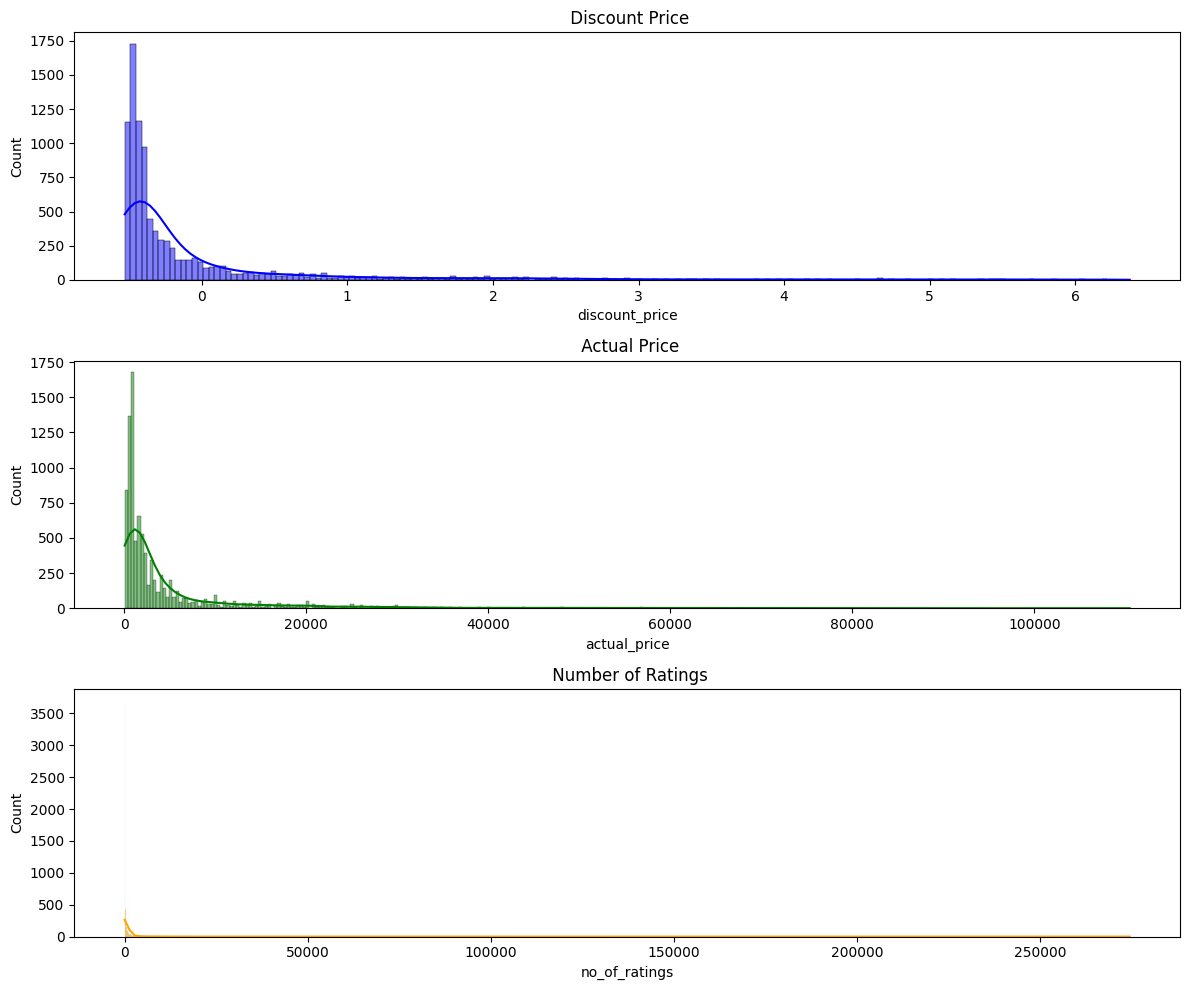

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(3, 1, figsize=(12, 10))
sns.histplot(df['discount_price'], kde=True, ax=axes[0], color='blue').set(title=" Discount Price")
sns.histplot(df['actual_price'], kde=True, ax=axes[1], color='green').set(title=" Actual Price")
sns.histplot(df['no_of_ratings'], kde=True, ax=axes[2], color='orange').set(title=" Number of Ratings")
#sns.histplot(df['discount_price'], kde=True, ax=axes[1, 1], color='red').set(title="Discount Price")

plt.tight_layout()
plt.show()

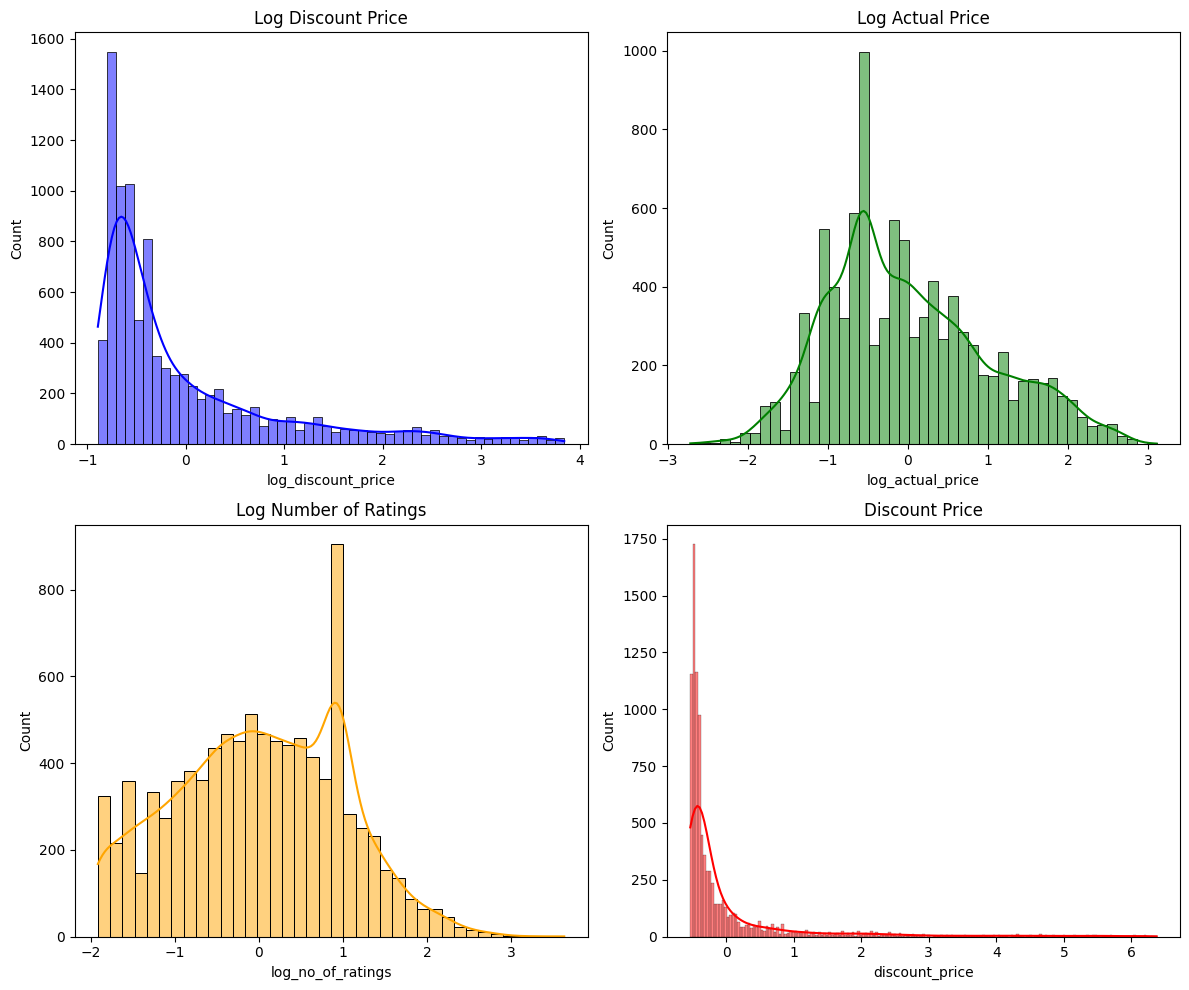

In [51]:

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(df['log_discount_price'], kde=True, ax=axes[0, 0], color='blue').set(title="Log Discount Price")
sns.histplot(df['log_actual_price'], kde=True, ax=axes[0, 1], color='green').set(title="Log Actual Price")
sns.histplot(df['log_no_of_ratings'], kde=True, ax=axes[1, 0], color='orange').set(title="Log Number of Ratings")
sns.histplot(df['discount_price'], kde=True, ax=axes[1, 1], color='red').set(title="Discount Price")

plt.tight_layout()
plt.show()


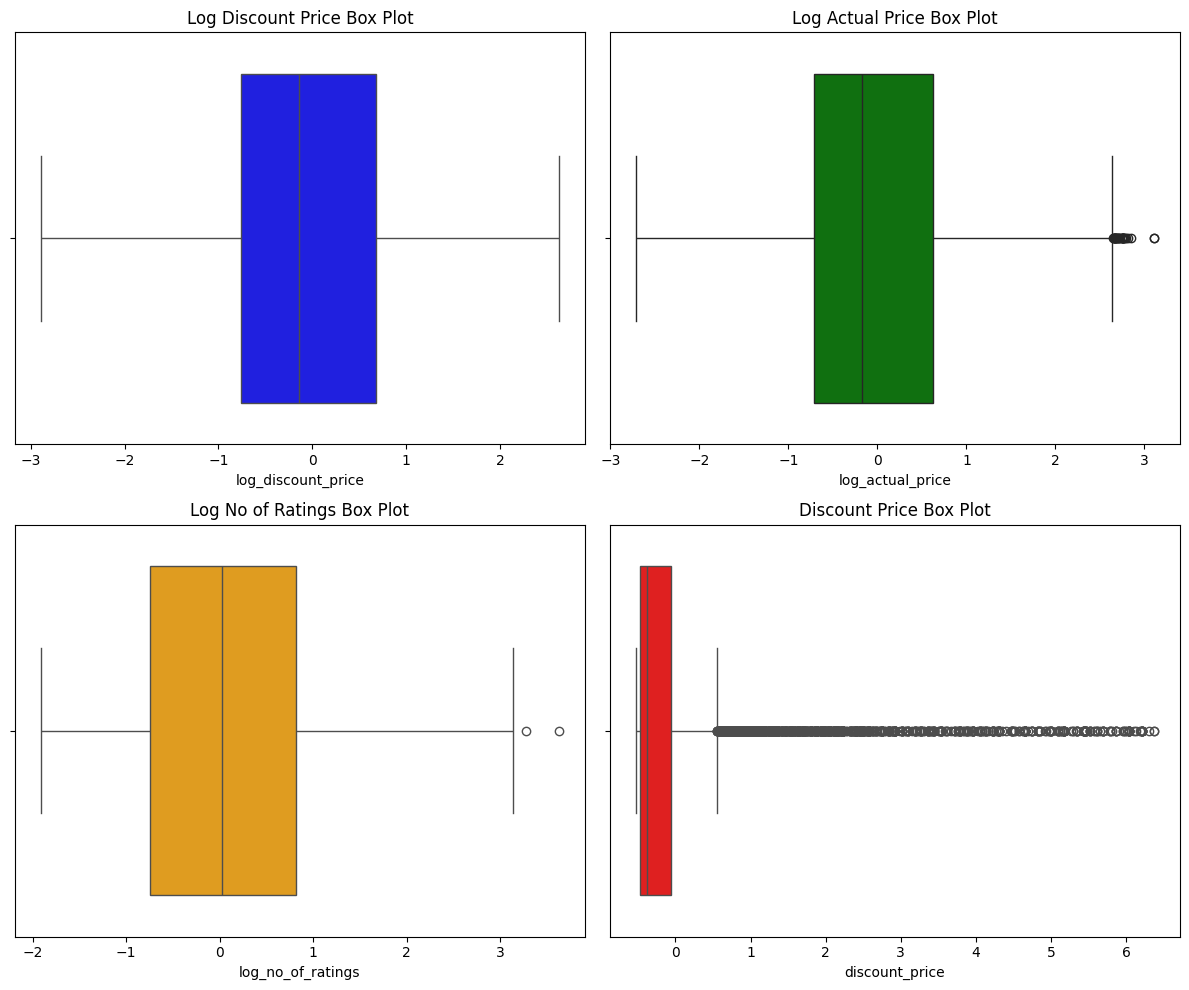

In [28]:
# Box plots to detect outliers
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.boxplot(x=df['log_discount_price'], ax=axes[0, 0], color='blue').set(title="Log Discount Price Box Plot")
sns.boxplot(x=df['log_actual_price'], ax=axes[0, 1], color='green').set(title="Log Actual Price Box Plot")
sns.boxplot(x=df['log_no_of_ratings'], ax=axes[1, 0], color='orange').set(title="Log No of Ratings Box Plot")
sns.boxplot(x=df['discount_price'], ax=axes[1, 1], color='red').set(title="Discount Price Box Plot")

plt.tight_layout()
plt.show()


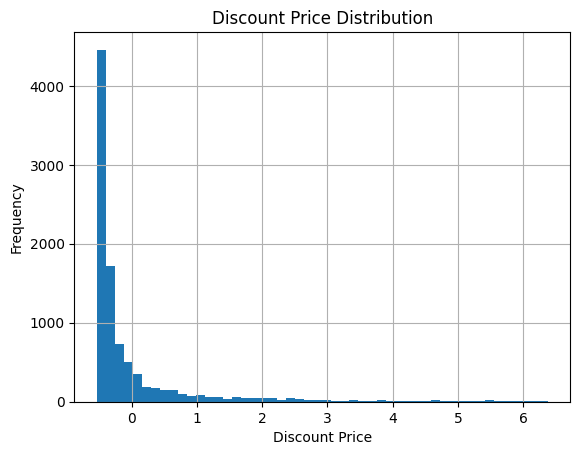

In [29]:
df['discount_price'].hist(bins=50)
plt.title('Discount Price Distribution')
plt.xlabel('Discount Price')
plt.ylabel('Frequency')
plt.show()


In [30]:
df.isna().sum()

ratings               0
no_of_ratings         0
discount_price        0
actual_price          0
price_diff            0
discount_percent      0
log_discount_price    0
log_actual_price      0
log_no_of_ratings     0
dtype: int64

In [36]:
from scipy import stats



In [52]:
Q1 = df[['log_discount_price', 'log_actual_price', 'log_no_of_ratings', 'discount_price']].quantile(0.25)
Q3 = df[['log_discount_price', 'log_actual_price', 'log_no_of_ratings', 'discount_price']].quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[~((df[['log_discount_price', 'log_actual_price', 'log_no_of_ratings', 'discount_price']] < (Q1 - 1.5 * IQR)) |
                      (df[['log_discount_price', 'log_actual_price', 'log_no_of_ratings', 'discount_price']] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [53]:

lower_limit = df['log_discount_price'].quantile(0.01)
upper_limit = df['log_discount_price'].quantile(0.99)

df['log_discount_price'] = df['log_discount_price'].clip(lower=lower_limit, upper=upper_limit)


In [44]:
print(df['log_discount_price'].describe())


count    9481.000000
mean        0.001050
std         0.994697
min        -1.701177
25%        -0.760842
50%        -0.143566
75%         0.673405
max         2.468115
Name: log_discount_price, dtype: float64


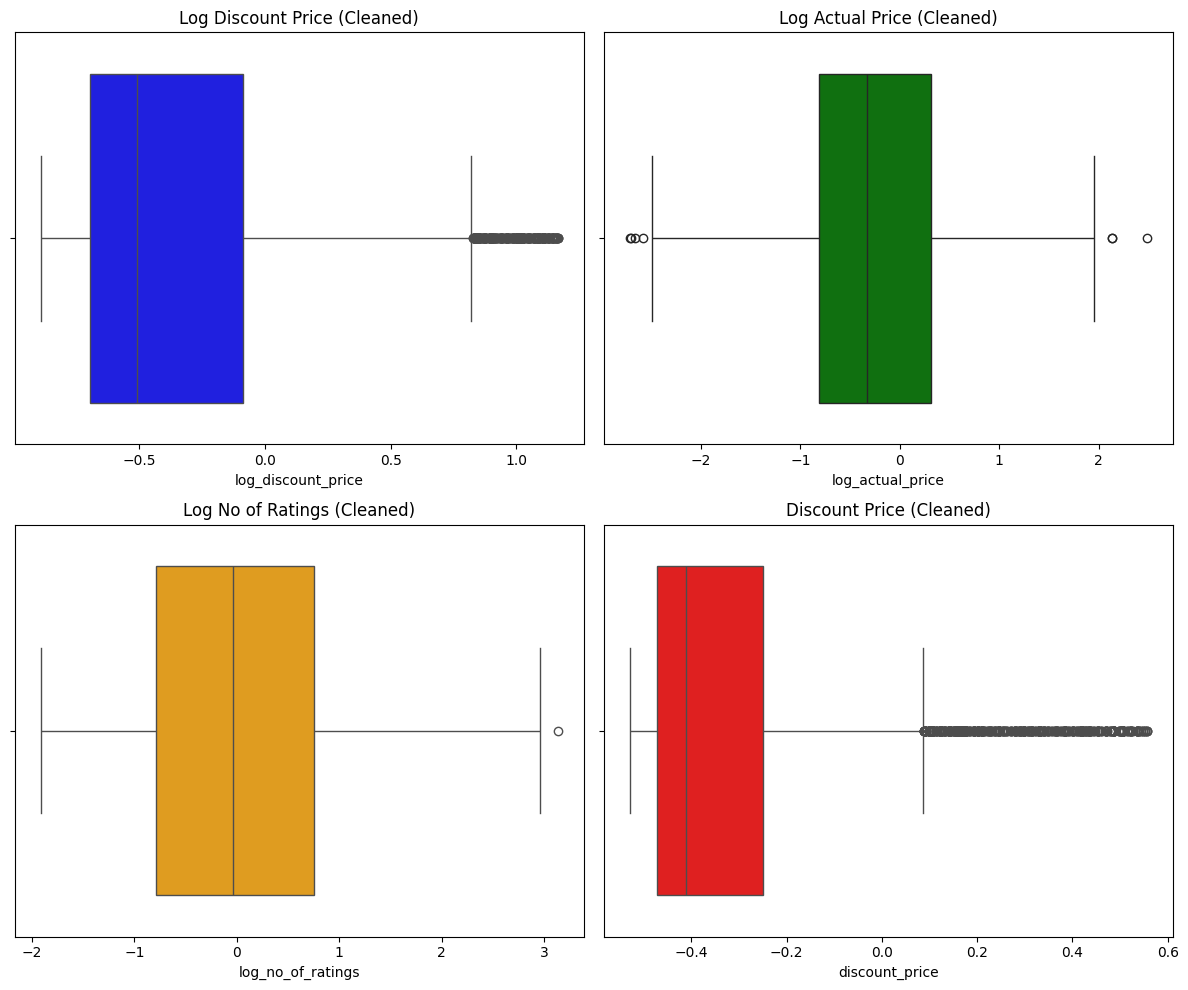

In [54]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.boxplot(x=df_no_outliers['log_discount_price'], ax=axes[0, 0], color='blue').set(title="Log Discount Price (Cleaned)")
sns.boxplot(x=df_no_outliers['log_actual_price'], ax=axes[0, 1], color='green').set(title="Log Actual Price (Cleaned)")
sns.boxplot(x=df_no_outliers['log_no_of_ratings'], ax=axes[1, 0], color='orange').set(title="Log No of Ratings (Cleaned)")
sns.boxplot(x=df_no_outliers['discount_price'], ax=axes[1, 1], color='red').set(title="Discount Price (Cleaned)")

plt.tight_layout()
plt.show()

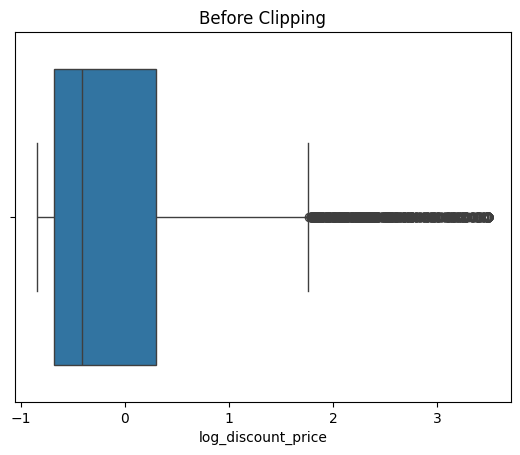

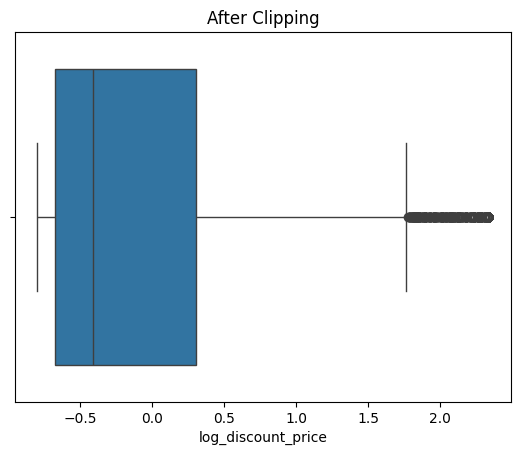

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Before Clipping
sns.boxplot(x=df['log_discount_price'])
plt.title('Before Clipping')
plt.show()

# Apply Clipping
lower_limit = df['log_discount_price'].quantile(0.05)
upper_limit = df['log_discount_price'].quantile(0.95)
df['log_discount_price'] = df['log_discount_price'].clip(lower=lower_limit, upper=upper_limit)

# After Clipping
sns.boxplot(x=df['log_discount_price'])
plt.title('After Clipping')
plt.show()


In [34]:
X = df_no_outliers[['log_discount_price', 'log_actual_price', 'log_no_of_ratings', 'discount_price']]
y = df_no_outliers['actual_price']


In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training features shape: {X_train.shape}")
print(f"Test features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Test target shape: {y_test.shape}")


Training features shape: (6590, 4)
Test features shape: (1648, 4)
Training target shape: (6590,)
Test target shape: (1648,)


In [103]:
print(df.isna().sum())

ratings               0
no_of_ratings         0
discount_price        0
actual_price          0
price_diff            0
discount_percent      0
log_discount_price    0
log_actual_price      0
log_no_of_ratings     0
dtype: int64


In [104]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [105]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 549.84
MSE: 1132017.23
RMSE: 1063.96
R² Score: 0.82


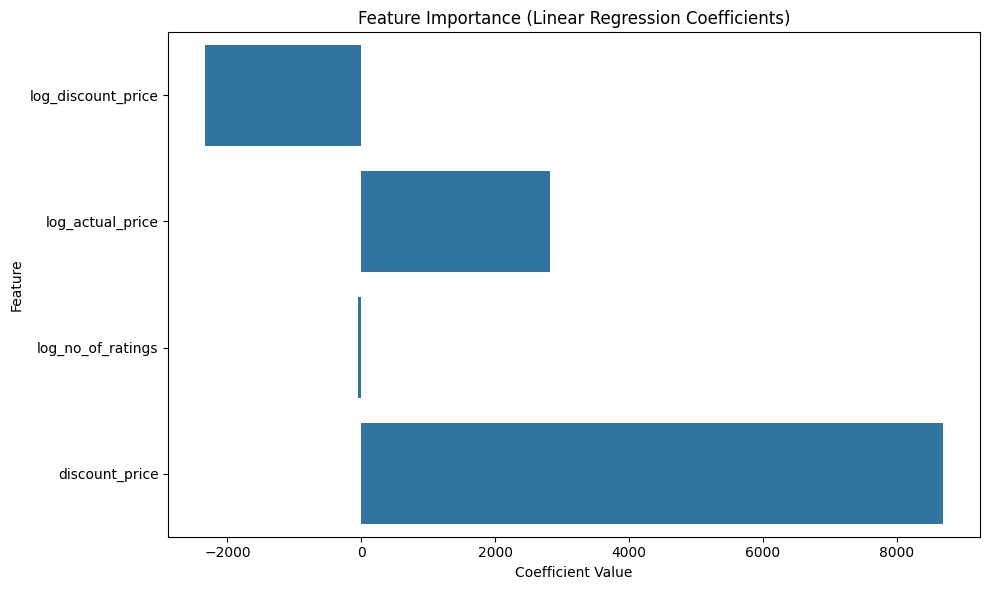

In [106]:
coefficients = model.coef_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients, y=features)
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


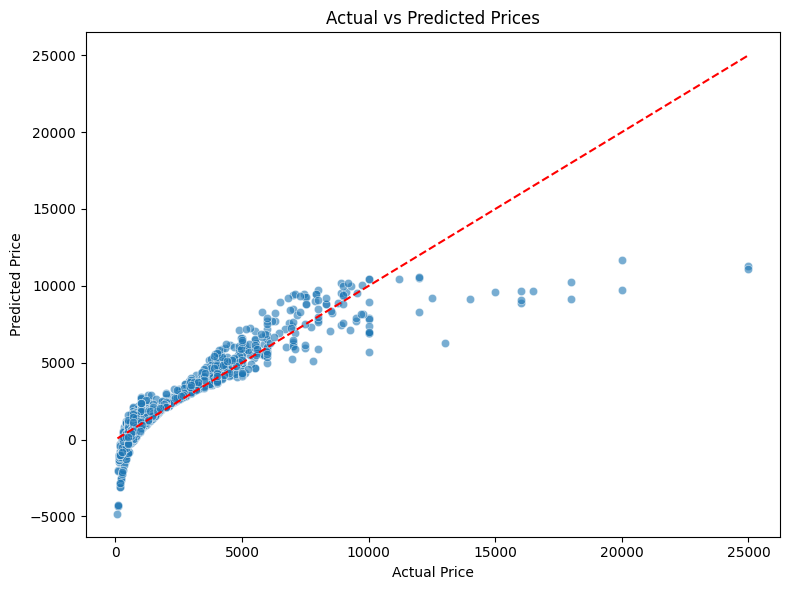

In [ ]:
y_pred = model.predict(X_test)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.tight_layout()
plt.show()


In [108]:
y_pred = model.predict(X_test)


In [109]:
X_test['predicted_price'] = y_pred
X_test['actual_price'] = y_test.values
X_test['price_gap'] = X_test['predicted_price'] - X_test['actual_price']


In [110]:
X_test['price_action'] = X_test['price_gap'].apply(
    lambda x: 'Lower Price' if x < -100 else ('Raise Price' if x > 100 else 'Keep Same')
)


In [111]:
result_df = X_test.copy()
result_df['predicted_price'] = y_pred
result_df['actual_price'] = y_test.values
result_df['price_gap'] = result_df['predicted_price'] - result_df['actual_price']
result_df['price_action'] = result_df['price_gap'].apply(
    lambda x: 'Lower Price' if x < -100 else ('Raise Price' if x > 100 else 'Keep Same')
)
print(result_df[['actual_price', 'predicted_price', 'price_gap', 'price_action']].head(10))

      actual_price  predicted_price     price_gap price_action
871         1789.0      1911.401415    122.401415  Raise Price
7006        1050.0       918.664877   -131.335123  Lower Price
2025        4000.0      4046.793429     46.793429    Keep Same
7819        3000.0      3148.737854    148.737854  Raise Price
6607        5575.0      5871.298869    296.298869  Raise Price
2797       20000.0      9714.080633 -10285.919367  Lower Price
2055         270.0      -598.734480   -868.734480  Lower Price
5938        1399.0      1567.278976    168.278976  Raise Price
387         4200.0      4460.646008    260.646008  Raise Price
4466        1199.0      1050.930326   -148.069674  Lower Price


In [113]:
result_df.to_csv('price_optimization_output.csv', index=False)
print("CSV file saved as 'price_optimization_output.csv'")



CSV file saved as 'price_optimization_output.csv'
